In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score
from tabulate import tabulate
import plotly.io as pio
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

In [2]:
data = pd.read_csv("students_adaptability_level_online_education.csv")
data.shape

(1205, 14)

In [3]:
data.head()

Gender    Age Education Level Institution Type IT Student Location  \
0    Boy  21-25      University   Non Government         No      Yes   
1   Girl  21-25      University   Non Government         No      Yes   
2   Girl  16-20         College       Government         No      Yes   
3   Girl  11-15          School   Non Government         No      Yes   
4   Girl  16-20          School   Non Government         No      Yes   

  Load-shedding Financial Condition Internet Type Network Type Class Duration  \
0           Low                 Mid          Wifi           4G            3-6   
1          High                 Mid   Mobile Data           4G            1-3   
2           Low                 Mid          Wifi           4G            1-3   
3           Low                 Mid   Mobile Data           4G            1-3   
4           Low                Poor   Mobile Data           3G              0   

  Self Lms  Device Adaptivity Level  
0       No     Tab         Moderate  
1      Yes  Mobile         Moderate  
2       No  Mobile         Moderate  
3       No  Mobile         Moderate  
4       No  Mobile              Low

In [4]:
data.dtypes

Gender                 object
Age                    object
Education Level        object
Institution Type       object
IT Student             object
Location               object
Load-shedding          object
Financial Condition    object
Internet Type          object
Network Type           object
Class Duration         object
Self Lms               object
Device                 object
Adaptivity Level       object
dtype: object

In [5]:
data.isna().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

In [6]:
count_per_category = data['Adaptivity Level'].value_counts()

print("Broj uzoraka po kategorijama ciljne promenljive:")
print(count_per_category)
percentage_per_category = np.round((count_per_category / len(data)) * 100, 2)

print("\nProcentualni udeo svake kategorije ciljne promenljive:")
print(percentage_per_category)

Broj uzoraka po kategorijama ciljne promenljive:
Moderate    625
Low         480
High        100
Name: Adaptivity Level, dtype: int64

Procentualni udeo svake kategorije ciljne promenljive:
Moderate    51.87
Low         39.83
High         8.30
Name: Adaptivity Level, dtype: float64


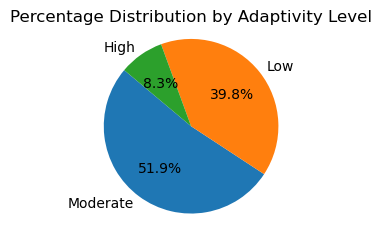

In [7]:
plt.figure(figsize=(2.5, 2.5))
plt.pie(percentage_per_category, labels=percentage_per_category.index, autopct='%1.1f%%', startangle=140)

plt.axis('equal')

plt.title('Percentage Distribution by Adaptivity Level')

plt.show()

In [8]:
X = data.drop(columns=['Adaptivity Level'])
y = data[['Adaptivity Level']]

# Podela skupa podataka na trening i test skup (90/10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [9]:
# Novi skup data_train koji ce biti balansiran
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

Gender    Age Education Level Institution Type IT Student Location  \
14     Girl  11-15          School   Non Government         No      Yes   
1093    Boy  16-20          School       Government         No      Yes   
506    Girl   6-10          School   Non Government         No      Yes   
103     Boy  11-15          School   Non Government        Yes      Yes   
1006   Girl  21-25      University   Non Government         No      Yes   

     Load-shedding Financial Condition Internet Type Network Type  \
14             Low                Poor   Mobile Data           3G   
1093           Low                 Mid          Wifi           4G   
506            Low                Rich          Wifi           4G   
103            Low                 Mid   Mobile Data           4G   
1006           Low                Rich          Wifi           4G   

     Class Duration Self Lms    Device Adaptivity Level  
14              1-3       No    Mobile         Moderate  
1093            1-3       No    Mobile         Moderate  
506             1-3       No    Mobile             High  
103             1-3       No    Mobile         Moderate  
1006            3-6       No  Computer         Moderate

In [10]:
# Nalazenje indeksa uzoraka koji pripadaju klasi "High"
high_indices = data_train[data_train['Adaptivity Level'] == 'High'].index

# Balansiranje - dupliranje uzoraka koji pripadaju klasi "High"
high_samples = data_train.loc[high_indices]

for _ in range(4):
    data_train = pd.concat([data_train, high_samples])

data_train.head()

Gender    Age Education Level Institution Type IT Student Location  \
14     Girl  11-15          School   Non Government         No      Yes   
1093    Boy  16-20          School       Government         No      Yes   
506    Girl   6-10          School   Non Government         No      Yes   
103     Boy  11-15          School   Non Government        Yes      Yes   
1006   Girl  21-25      University   Non Government         No      Yes   

     Load-shedding Financial Condition Internet Type Network Type  \
14             Low                Poor   Mobile Data           3G   
1093           Low                 Mid          Wifi           4G   
506            Low                Rich          Wifi           4G   
103            Low                 Mid   Mobile Data           4G   
1006           Low                Rich          Wifi           4G   

     Class Duration Self Lms    Device Adaptivity Level  
14              1-3       No    Mobile         Moderate  
1093            1-3       No    Mobile         Moderate  
506             1-3       No    Mobile             High  
103             1-3       No    Mobile         Moderate  
1006            3-6       No  Computer         Moderate

In [11]:
# Sada je broj uzoraka u X_train i y_train balansiran
X_train = data_train.drop(columns=['Adaptivity Level'])
y_train = data_train[['Adaptivity Level']]

In [12]:
data_train_transformed = pd.concat([X_train, y_train], axis=1)
data_test_transformed = pd.concat([X_test, y_test], axis=1)
data = pd.concat([data_train_transformed, data_test_transformed], axis=0)

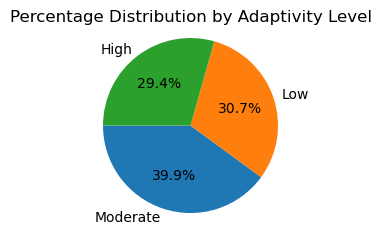

In [13]:
count_per_category = data['Adaptivity Level'].value_counts()

percentage_per_category = np.round((count_per_category / len(data)) * 100, 2)

plt.figure(figsize=(2.5, 2.5))
plt.pie(percentage_per_category, labels=percentage_per_category.index, autopct='%1.1f%%', startangle=180)

plt.axis('equal')

plt.title('Percentage Distribution by Adaptivity Level')

plt.show()

In [14]:
datasets = {'X_train': X_train, 'y_train': y_train, 'data_train': data}
for dataset_name, dataset in datasets.items():
    if dataset.index.duplicated().any():
        print(f'Postoje duple vrednosti indeksa u {dataset_name}.')
        dataset.reset_index(drop=True, inplace=True)
        print(f'Vrednosti indeksa su resetovane u {dataset_name}')
    else:
        print(f'Ne postoje duple vrednosti indeksa u {dataset_name}.')

Postoje duple vrednosti indeksa u X_train.
Vrednosti indeksa su resetovane u X_train
Postoje duple vrednosti indeksa u y_train.
Vrednosti indeksa su resetovane u y_train
Postoje duple vrednosti indeksa u data_train.
Vrednosti indeksa su resetovane u data_train


In [15]:
data.describe()

Gender    Age Education Level Institution Type IT Student Location  \
count    1565   1565            1565             1565       1565     1565   
unique      2      6               3                2          2        2   
top       Boy  21-25          School   Non Government         No      Yes   
freq      919    522             690             1115       1133     1267   

       Load-shedding Financial Condition Internet Type Network Type  \
count           1565                1565          1565         1565   
unique             2                   3             2            3   
top              Low                 Mid   Mobile Data           4G   
freq            1312                1010           831         1059   

       Class Duration Self Lms  Device Adaptivity Level  
count            1565     1565    1565             1565  
unique              3        2       3                3  
top               1-3       No  Mobile         Moderate  
freq             1140     1235    1253              625

In [16]:
print("Jedinstvene vrednosti svakog obelezja:")
for i in data:
    print(i, ":", data[i].unique().tolist())

Jedinstvene vrednosti svakog obelezja:
Gender : ['Girl', 'Boy']
Age : ['11-15', '16-20', '6-10', '21-25', '26-30', '1-5']
Education Level : ['School', 'University', 'College']
Institution Type : ['Non Government', 'Government']
IT Student : ['No', 'Yes']
Location : ['Yes', 'No']
Load-shedding : ['Low', 'High']
Financial Condition : ['Poor', 'Mid', 'Rich']
Internet Type : ['Mobile Data', 'Wifi']
Network Type : ['3G', '4G', '2G']
Class Duration : ['1-3', '3-6', '0']
Self Lms : ['No', 'Yes']
Device : ['Mobile', 'Computer', 'Tab']
Adaptivity Level : ['Moderate', 'High', 'Low']


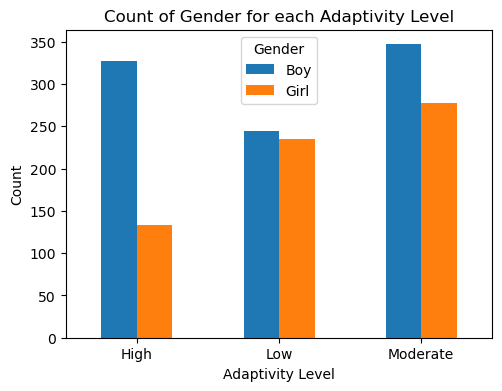

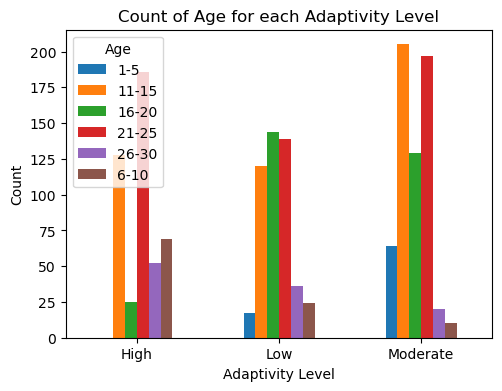

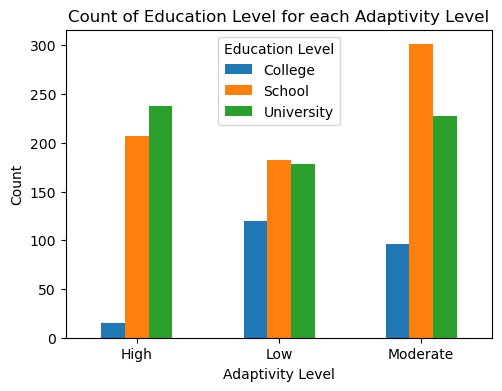

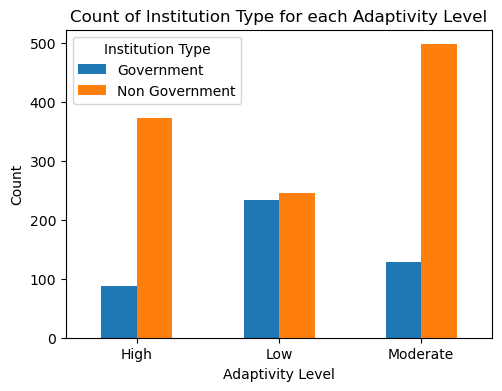

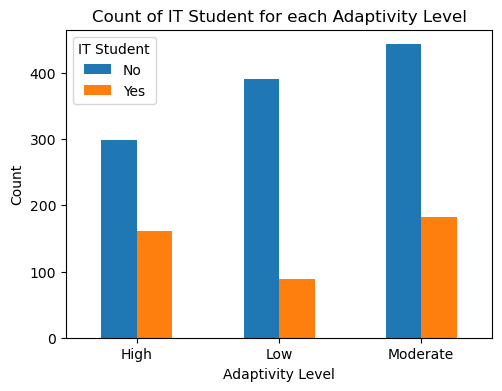

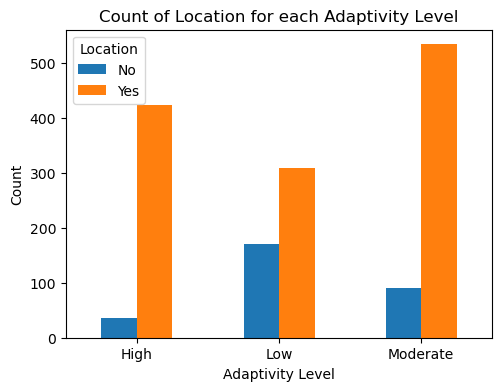

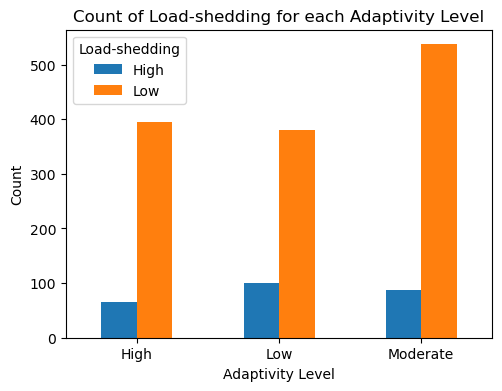

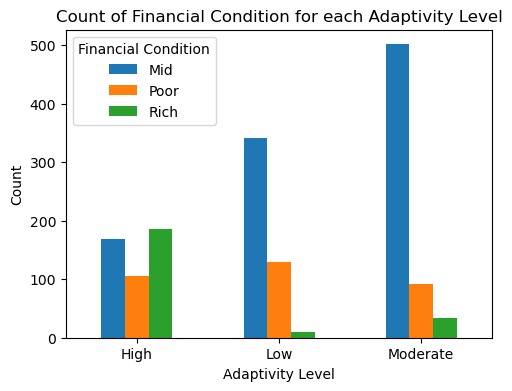

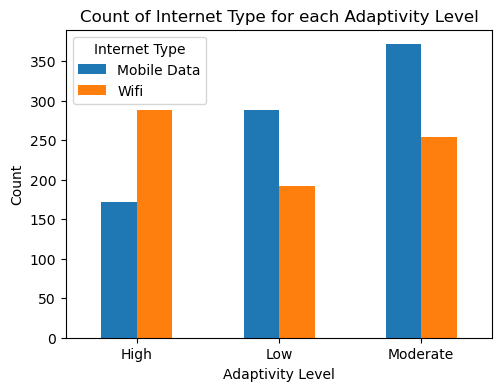

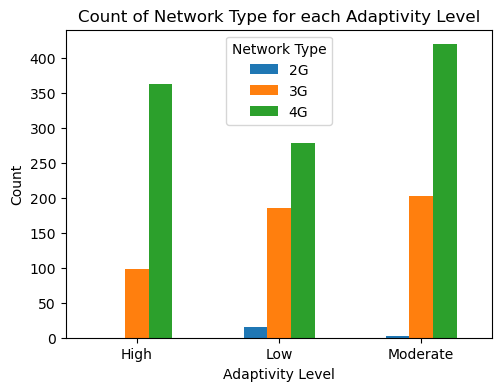

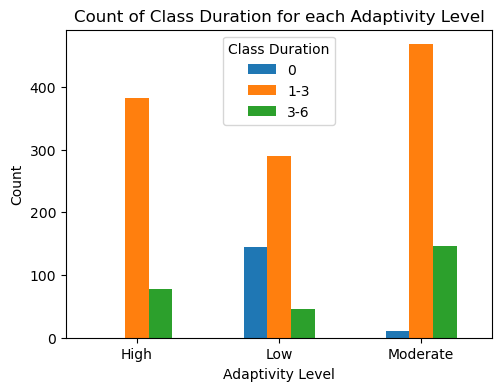

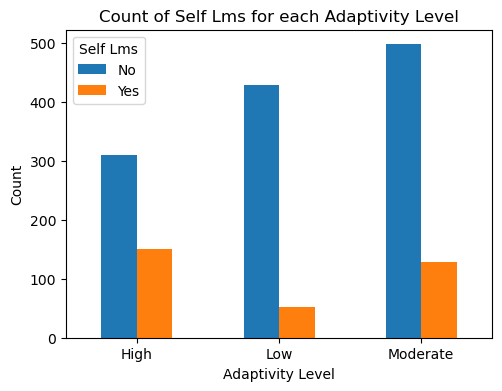

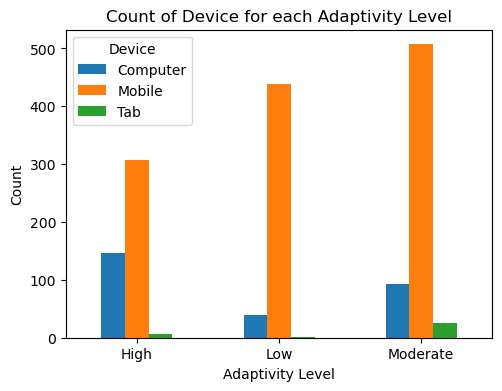

In [17]:
# Histogram za svako obelezje u odnosu na ciljnu promenljivu
for feature in data.columns[:-1]:
    counts = data.groupby(['Adaptivity Level', feature]).size().unstack()

    counts.plot(kind='bar', stacked=False, figsize=(5.5, 4))
    plt.title(f'Count of {feature} for each Adaptivity Level')
    plt.xlabel('Adaptivity Level')
    plt.ylabel('Count')
    plt.xticks(rotation=0)

    plt.legend(title=feature)
    plt.show()

In [18]:
fig = px.sunburst(data, path=['Age', 'Adaptivity Level'])

fig.update_layout(title='Sunburst Chart for Adaptivity Level',title_x=0.5, font=dict(size=16, color='black'))

fig.show()

In [19]:
fig = px.sunburst(data, path=['Financial Condition', 'Adaptivity Level'])

fig.update_layout(title='Sunburst Chart for Adaptivity Level', title_x=0.5, font=dict(size=16, color='black'))

fig.show()

In [20]:
columns = ['Gender','Age','Education Level','Institution Type','IT Student','Location',
           'Load-shedding','Financial Condition','Internet Type','Network Type',
           'Class Duration','Self Lms','Device','Adaptivity Level']

In [21]:
numeric_features = [feature for feature in columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in columns if data[feature].dtype == 'O']

# print columns
print(f'Postoji {len(numeric_features)} numerickih obelezja : {numeric_features}')
print(f'\nPostoji {len(categorical_features)} kategorickih obelezja : {categorical_features}')

Postoji 0 numerickih obelezja : []

Postoji 14 kategorickih obelezja : ['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student', 'Location', 'Load-shedding', 'Financial Condition', 'Internet Type', 'Network Type', 'Class Duration', 'Self Lms', 'Device', 'Adaptivity Level']


In [22]:
# Broj jedinstvenih vrednosti po obelezjima
unique_counts = data.nunique()
print(unique_counts)

# Binarna obelezja
binary_features = unique_counts[unique_counts == 2].index.tolist()

print("\nBinarna obelezja: ", binary_features)

# Nebinarna obelezja
non_binary_features = list(set(columns) - set(binary_features))

print("Obelezja sa vise od 2 kategorije : ", non_binary_features)

Gender                 2
Age                    6
Education Level        3
Institution Type       2
IT Student             2
Location               2
Load-shedding          2
Financial Condition    3
Internet Type          2
Network Type           3
Class Duration         3
Self Lms               2
Device                 3
Adaptivity Level       3
dtype: int64

Binarna obelezja:  ['Gender', 'Institution Type', 'IT Student', 'Location', 'Load-shedding', 'Internet Type', 'Self Lms']
Obelezja sa vise od 2 kategorije :  ['Network Type', 'Class Duration', 'Device', 'Adaptivity Level', 'Education Level', 'Financial Condition', 'Age']


In [23]:
binary_features.append('Device')
dummy_features = binary_features
print("Dummy varijable ce biti kreirane za obelezja:", dummy_features)

Dummy varijable ce biti kreirane za obelezja: ['Gender', 'Institution Type', 'IT Student', 'Location', 'Load-shedding', 'Internet Type', 'Self Lms', 'Device']


In [24]:
dummy_one_hot = pd.get_dummies(X_train[dummy_features], drop_first=True)
dummy_one_hot.head()

Gender_Girl  Institution Type_Non Government  IT Student_Yes  Location_Yes  \
0            1                                1               0             1   
1            0                                0               0             1   
2            1                                1               0             1   
3            0                                1               1             1   
4            1                                1               0             1   

   Load-shedding_Low  Internet Type_Wifi  Self Lms_Yes  Device_Mobile  \
0                  1                   0             0              1   
1                  1                   1             0              1   
2                  1                   1             0              1   
3                  1                   0             0              1   
4                  1                   1             0              0   

   Device_Tab  
0           0  
1           0  
2           0  
3           0  
4           0

In [25]:
X_train = pd.concat([X_train, pd.DataFrame(dummy_one_hot, columns=dummy_one_hot.columns)], axis=1)
X_train.drop(columns=dummy_features, inplace=True)
X_train.head()

Age Education Level Financial Condition Network Type Class Duration  \
0  11-15          School                Poor           3G            1-3   
1  16-20          School                 Mid           4G            1-3   
2   6-10          School                Rich           4G            1-3   
3  11-15          School                 Mid           4G            1-3   
4  21-25      University                Rich           4G            3-6   

   Gender_Girl  Institution Type_Non Government  IT Student_Yes  Location_Yes  \
0            1                                1               0             1   
1            0                                0               0             1   
2            1                                1               0             1   
3            0                                1               1             1   
4            1                                1               0             1   

   Load-shedding_Low  Internet Type_Wifi  Self Lms_Yes  Device_Mobile  \
0                  1                   0             0              1   
1                  1                   1             0              1   
2                  1                   1             0              1   
3                  1                   0             0              1   
4                  1                   1             0              0   

   Device_Tab  
0           0  
1           0  
2           0  
3           0  
4           0

In [26]:
dummy_one_hot = pd.get_dummies(X_test[dummy_features], drop_first=True)
dummy_one_hot.head()

Gender_Girl  Institution Type_Non Government  IT Student_Yes  \
730            1                                1               1   
10             1                                0               0   
72             0                                0               0   
334            1                                1               0   
870            0                                0               0   

     Location_Yes  Load-shedding_Low  Internet Type_Wifi  Self Lms_Yes  \
730             1                  1                   1             1   
10              1                  1                   1             0   
72              1                  1                   0             0   
334             1                  1                   1             0   
870             1                  1                   1             0   

     Device_Mobile  Device_Tab  
730              1           0  
10               1           0  
72               1           0  
334              1           0  
870              1           0

In [27]:
X_test = pd.concat([X_test, pd.DataFrame(dummy_one_hot, columns=dummy_one_hot.columns)], axis=1)
X_test.drop(columns=dummy_features, inplace=True)
X_test.head()

Age Education Level Financial Condition Network Type Class Duration  \
730  21-25      University                 Mid           3G            3-6   
10   16-20      University                 Mid           4G            1-3   
72   21-25      University                 Mid           4G              0   
334  16-20         College                 Mid           4G            3-6   
870  16-20         College                 Mid           4G            3-6   

     Gender_Girl  Institution Type_Non Government  IT Student_Yes  \
730            1                                1               1   
10             1                                0               0   
72             0                                0               0   
334            1                                1               0   
870            0                                0               0   

     Location_Yes  Load-shedding_Low  Internet Type_Wifi  Self Lms_Yes  \
730             1                  1                   1             1   
10              1                  1                   1             0   
72              1                  1                   0             0   
334             1                  1                   1             0   
870             1                  1                   1             0   

     Device_Mobile  Device_Tab  
730              1           0  
10               1           0  
72               1           0  
334              1           0  
870              1           0

In [28]:
# Mapiranje kategorija na numeričke vrednosti
age_mappings = {'1-5' : 0, '6-10' : 1, '11-15' : 2, '16-20' : 3, '21-25' : 4, '26-30' : 5}
X_train['Age'] = X_train['Age'].map(age_mappings)
X_test['Age'] = X_test['Age'].map(age_mappings)

education_mappings = {'School' : 0, 'College' : 1, 'University' : 2}
X_train['Education Level'] = X_train['Education Level'].map(education_mappings)
X_test['Education Level'] = X_test['Education Level'].map(education_mappings)

finance_mappings = {'Poor' : 0, 'Mid' : 1, 'Rich' : 2}
X_train['Financial Condition'] = X_train['Financial Condition'].map(finance_mappings)
X_test['Financial Condition'] = X_test['Financial Condition'].map(finance_mappings)

network_mappings = {'2G' : 0, '3G' : 1, '4G' : 2}
X_train['Network Type'] = X_train['Network Type'].map(network_mappings)
X_test['Network Type'] = X_test['Network Type'].map(network_mappings)

class_mappings = {'0' : 0, '1-3' : 1, '3-6' : 2}
X_train['Class Duration'] = X_train['Class Duration'].map(class_mappings)
X_test['Class Duration'] = X_test['Class Duration'].map(class_mappings)

X_train.head()

Age  Education Level  Financial Condition  Network Type  Class Duration  \
0    2                0                    0             1               1   
1    3                0                    1             2               1   
2    1                0                    2             2               1   
3    2                0                    1             2               1   
4    4                2                    2             2               2   

   Gender_Girl  Institution Type_Non Government  IT Student_Yes  Location_Yes  \
0            1                                1               0             1   
1            0                                0               0             1   
2            1                                1               0             1   
3            0                                1               1             1   
4            1                                1               0             1   

   Load-shedding_Low  Internet Type_Wifi  Self Lms_Yes  Device_Mobile  \
0                  1                   0             0              1   
1                  1                   1             0              1   
2                  1                   1             0              1   
3                  1                   0             0              1   
4                  1                   1             0              0   

   Device_Tab  
0           0  
1           0  
2           0  
3           0  
4           0

In [29]:
# Mapiranje kategorija na numeričke vrednosti
mappings = {"Low": 0, "Moderate": 1, "High": 2}
y_train['Adaptivity Level'] = y_train['Adaptivity Level'].map(mappings)

In [30]:
# Mapiranje kategorija na numeričke vrednosti
mappings = {"Low": 0, "Moderate": 1, "High": 2}
y_test['Adaptivity Level'] = y_test['Adaptivity Level'].map(mappings)

In [31]:
data_train_transformed = pd.concat([X_train, y_train], axis=1)
data_test_transformed = pd.concat([X_test, y_test], axis=1)
data = pd.concat([data_train_transformed, data_test_transformed], axis=0)

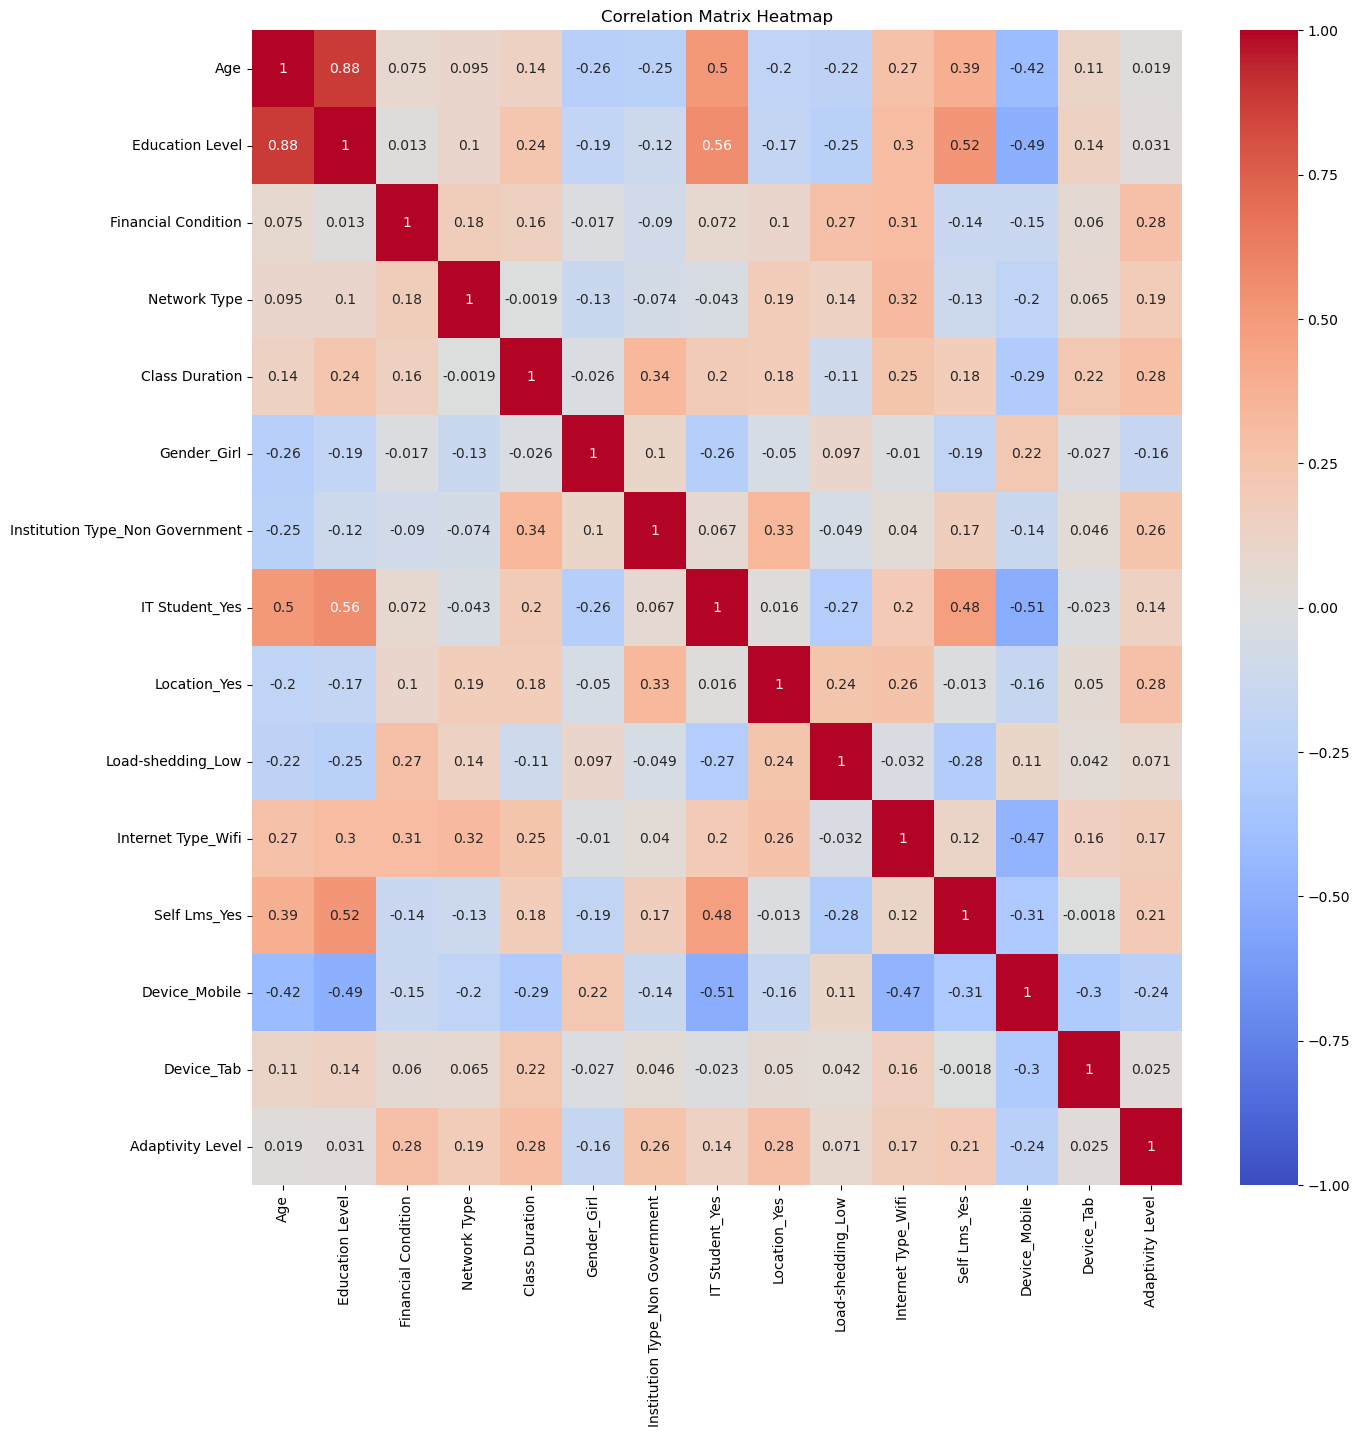

In [32]:
corr = data.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [33]:
def plot_correlation_for_col(df, col_name):
    plt.figure(figsize=(12,6))
    correlation_matrix = df.corr() 
    sorted_col_corr = correlation_matrix[col_name].sort_values(ascending=True) 
    sorted_col_corr = sorted_col_corr.drop(col_name)
    sns.barplot(x=sorted_col_corr.index, y=sorted_col_corr.values, palette='RdBu')
    plt.xticks(rotation=90);
    plt.tight_layout()
    plt.title(f'Correlation with {col_name}', fontsize=16)
    plt.savefig("pltcorrforcol",  dpi=100, bbox_inches='tight')
    plt.show()
    
def plot_explained_variance(pca_model):
    plt.figure(figsize=(9,3))
    
    explained_variance = pca_model.explained_variance_ratio_
    cumulative_variance = explained_variance.cumsum()

    plt.subplot(1, 2, 1)
    plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.8, align='center')
    plt.xlabel('Glavna komponenta')
    plt.ylabel('Objasnjena varijansa')

    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, '--o')
    plt.xlabel('Broj glavnih komponenti')
    plt.ylabel('Kumulativna varijansa')
    plt.tight_layout()
    plt.show()

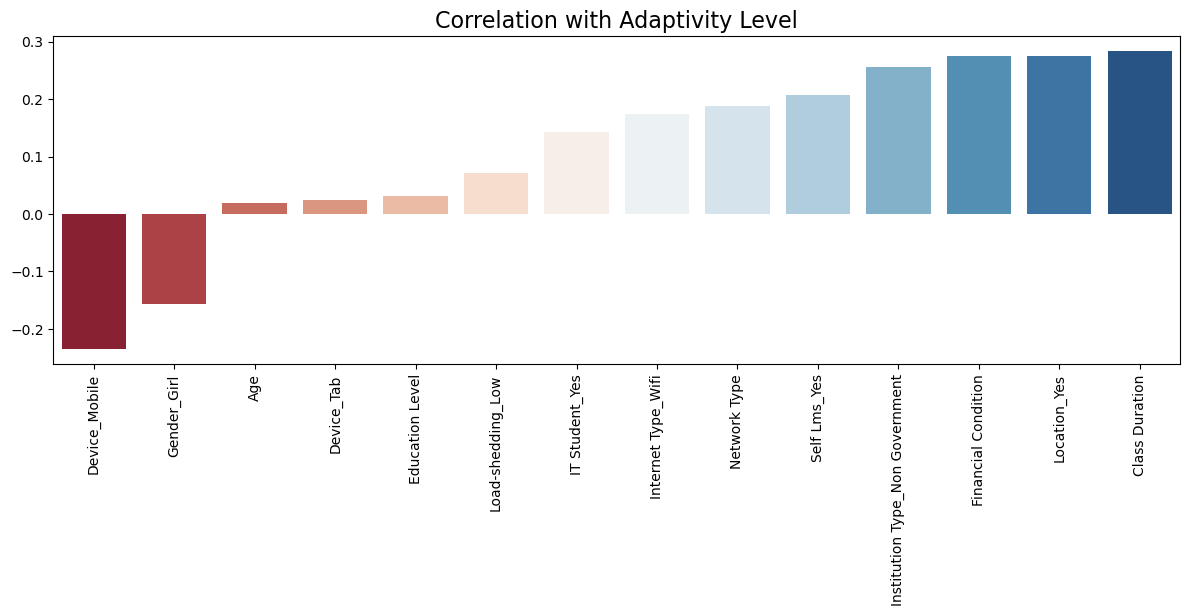

In [34]:
plot_correlation_for_col(data, col_name='Adaptivity Level')


In [35]:
# Kreiranje PCA modela
pca_model = PCA(n_components=10, random_state=42)

X_train_pca = pca_model.fit_transform(X_train)

# Procenat sacuvanih informacija iz originalnih podataka
print(f'Ukupna varijansa: {sum(pca_model.explained_variance_ratio_) * 100:.1f}%')

X_train_pca_df = pd.DataFrame(X_train_pca)
X_test_pca = pca_model.transform(X_test)
X_test_pca_df = pd.DataFrame(X_test_pca)

X_train_pca_df

Ukupna varijansa: 95.3%


0         1         2         3         4         5         6  \
0     1.526158  0.830578  0.490185  0.313948  0.329093  0.131252 -0.483274   
1     0.435236 -0.296596 -0.855267 -0.528646 -0.060896  0.208181  0.120052   
2     2.101380 -1.307449 -0.202469  0.318521  0.245968 -0.449862  0.173552   
3     1.210280 -0.154103  0.086762 -0.509140 -0.664903  0.022602 -0.187889   
4    -1.531481 -1.462978  0.038292  0.726001  0.526838  0.417998 -0.049474   
...        ...       ...       ...       ...       ...       ...       ...   
1439  2.166204 -0.374561  0.396925  0.508100  0.261891 -0.543367 -0.006296   
1440  2.303825  0.715661  0.740981  0.241518  0.326933 -0.070174 -0.206514   
1441 -1.372510  0.899501  0.426991 -0.646166  0.246409  0.488096 -0.524886   
1442  2.303825  0.715661  0.740981  0.241518  0.326933 -0.070174 -0.206514   
1443 -1.834864  0.296202  1.084632 -1.024537  0.212288 -0.565043  0.235074   

             7         8         9  
0    -0.369901 -0.008194  0.299768  
1    -0.814656  0.064605  0.004285  
2     0.249752 -0.107415 -0.291402  
3     0.348653 -0.357503  0.529173  
4     0.155306 -0.023250  0.037737  
...        ...       ...       ...  
1439 -0.455196  0.206971 -0.145043  
1440 -0.131758  0.273230  0.277205  
1441  0.425267  0.322724 -0.568371  
1442 -0.131758  0.273230  0.277205  
1443 -0.175584 -0.312838  0.033966  

[1444 rows x 10 columns]

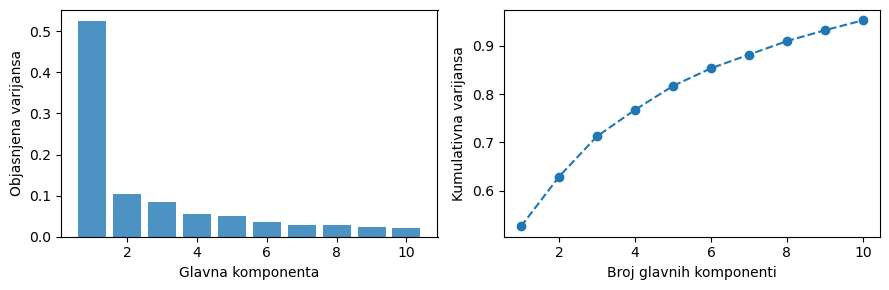

In [36]:
plot_explained_variance(pca_model)

In [37]:
# Definisanje parametara za GridSearch za kNN
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
    'weights': ['uniform', 'distance'],
    'metric': ['jaccard', 'hamming', 'dice', 'euclidean']
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_pca_df, np.ravel(y_train))

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Najbolji parametri:", best_params)
print("Najbolja tacnost:", best_score)

Najbolji parametri: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
Najbolja tacnost: 0.8815695886197616


In [38]:
# Definisanje parametara za GridSearch za SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [100, 10, 1, 0.1],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'decision_function_shape' : ['ovo', 'ovr']
} 

svc = SVC()

grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

grid_search.fit(X_train_pca_df, np.ravel(y_train))

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Najbolji parametri:", best_params)
print("Najbolja tacnost:", best_score)

Najbolji parametri: {'C': 0.1, 'decision_function_shape': 'ovo', 'gamma': 100, 'kernel': 'poly'}
Najbolja tacnost: 0.9030420991926181


In [39]:
# Definisanje parametara za GridSearch za stabla odluke
params = {
    'max_depth': range(1, 20, 2),
    'min_samples_leaf': range(1, 100, 5),
    'min_samples_split': range(2, 10),
    'criterion': ["gini", "entropy"],
    'splitter': ['best', 'random'],
    'max_features': ['auto', 'sqrt', 'log2']
}

dt = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=dt, param_grid=params, n_jobs=-1,  cv=5, scoring="accuracy")

grid_search.fit(X_train_pca_df, np.ravel(y_train))  

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Najbolji parametri:", best_params)
print("Najbolja tacnost:", best_score)

Najbolji parametri: {'criterion': 'entropy', 'max_depth': 13, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'}
Najbolja tacnost: 0.9037365436370626


Tacnost na test skupu:  0.9256198347107438
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        48
           1       0.95      0.90      0.93        63
           2       0.77      1.00      0.87        10

    accuracy                           0.93       121
   macro avg       0.89      0.95      0.91       121
weighted avg       0.93      0.93      0.93       121



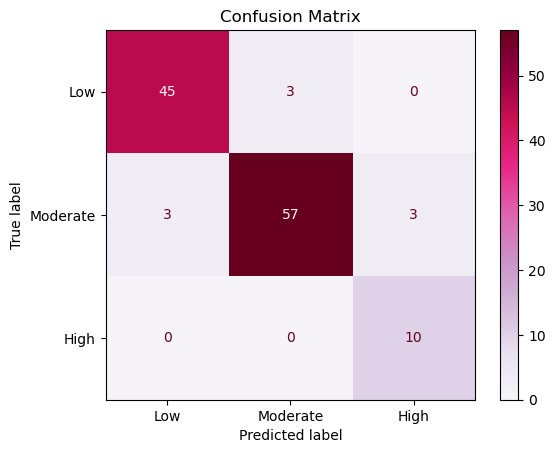

In [52]:
# Konacan kNN model
best_params_knn = {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}

knn_classifier = KNeighborsClassifier(**best_params_knn)

knn_classifier.fit(X_train_pca_df, np.ravel(y_train))

y_pred = knn_classifier.predict(X_test_pca_df)

accuracy_knn = accuracy_score(y_test, y_pred)
print("Tacnost na test skupu: ", accuracy_knn)

print(classification_report(y_test, y_pred, zero_division=1))

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Low","Moderate","High"])
disp.plot(cmap='PuRd')
plt.title("Confusion Matrix")
plt.show()

Tacnost na test skupu:  0.9090909090909091
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        48
           1       0.92      0.90      0.91        63
           2       0.75      0.90      0.82        10

    accuracy                           0.91       121
   macro avg       0.87      0.91      0.89       121
weighted avg       0.91      0.91      0.91       121



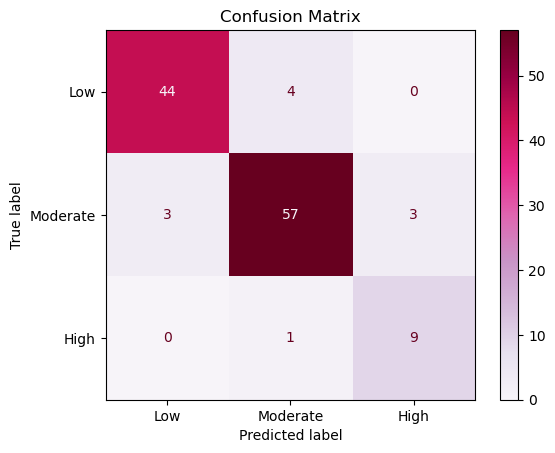

In [53]:
# Konacan SVM model
best_params_svc = {'C': 0.1, 'decision_function_shape': 'ovo', 'gamma': 100, 'kernel': 'poly'}

svc = SVC(**best_params_svc)

svc.fit(X_train_pca_df, np.ravel(y_train))

y_pred = svc.predict(X_test_pca_df)

accuracy_svc = accuracy_score(y_test, y_pred)
print("Tacnost na test skupu: ", accuracy_svc)

print(classification_report(y_test, y_pred, zero_division=1))

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Low","Moderate","High"])
disp.plot(cmap='PuRd')
plt.title("Confusion Matrix")
plt.show()

Tacnost na test skupu:  0.9090909090909091
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        48
           1       0.95      0.87      0.91        63
           2       0.77      1.00      0.87        10

    accuracy                           0.91       121
   macro avg       0.87      0.94      0.90       121
weighted avg       0.91      0.91      0.91       121



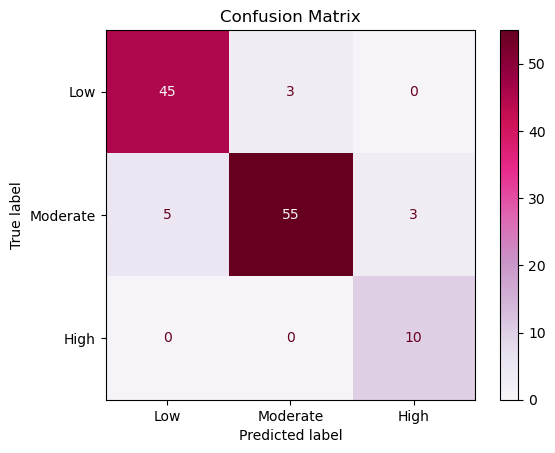

In [54]:
# Konacan model stabla odluke
best_params_dt =  {'criterion': 'entropy', 'max_depth': 13, 'max_features': 'log2', 'min_samples_leaf': 1,
                   'min_samples_split': 3, 'splitter': 'best'}

dt = DecisionTreeClassifier(**best_params_dt)

dt.fit(X_train_pca_df, np.ravel(y_train))

y_pred = dt.predict(X_test_pca_df)

accuracy_dt = accuracy_score(y_test, y_pred)
print("Tacnost na test skupu: ", accuracy_dt)

print(classification_report(y_test, y_pred, zero_division=1))

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Low","Moderate","High"])
disp.plot(cmap='PuRd')
plt.title("Confusion Matrix")
plt.show()

In [55]:
# Poredjenje modela i njihovih tacnosti
models = [
    "K-Nearest Neighbors",
    "Support Vector Machine",
    "Decision Tree"
]

accuracies = [
    f"{np.round(accuracy_knn * 100, 2)}%",  
    f"{np.round(accuracy_svc * 100, 2)}%",
    f"{np.round(accuracy_dt * 100, 2)}%"
]


results = zip(models, accuracies)

print(tabulate(results, headers=["Model", "Accuracy"], tablefmt="fancy_grid", stralign="center"))

╒════════════════════════╤════════════╕
│         Model          │  Accuracy  │
╞════════════════════════╪════════════╡
│  K-Nearest Neighbors   │   92.56%   │
├────────────────────────┼────────────┤
│ Support Vector Machine │   90.91%   │
├────────────────────────┼────────────┤
│     Decision Tree      │   90.91%   │
╘════════════════════════╧════════════╛
